In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets(".", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./t10k-labels-idx1-ubyte.gz


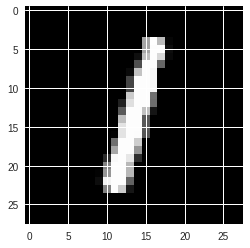

In [3]:
# show a random image from MNIST dataset
plt.imshow(mnist.train.next_batch(1)[0].reshape(28, 28), cmap="gist_gray")

In [0]:
class AutoEncoder:
    """Creates an AutoEncoder for compressing MNIST
    dataset
    
    Architecture
    ------------
    Image (28x28) -- Input Layer(1x784) -- Dense Layer(784x100) -- Output Layer(100x784)
    Loss Function: Mean Squared Error
    Optimizer: Adam Optimizer
    """
    def __init__(self)
        self.num_input = 28*28
        self.num_hidden_1 = 100
        self.num_output = num_input
        self.X = tf.placeholder(tf.float32, shape=[None, num_input])
    
    def forward_pass(self):
        """ Make a forward pass in the Neural Network"""
        W1 = tf.Variable(initial_value=tf
                         .truncated_normal([num_input, num_hidden_1]))
        W2 = tf.transpose(W1)
        b1 = tf.Variable(initial_value=tf.random_normal([num_hidden_1]))
        b2 = tf.Variable(initial_value=tf.random_normal([num_output]))
        
        hidden_output = tf.matmul(X, W1) + b1
        final_output = tf.matmul(hidden_output, W2) + b2
        return final_output
    
    def train(self):
        """Trains the Network"""
        y_pred = self.forward_pass()
        error = tf.losses.mean_squared_error(labels=self.X, 
                                             predictions=final_output)
        optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
        train = optimizer.minimize(error)
        init = tf.global_variables_initializer()
        
        with tf.Session() as sess:
            sess.run(init)
            for i in range(20000):
                X_batch, y_batch = mnist.train.next_batch(50)
                sess.run(train, feed_dict={X: X_batch})
                loss = sess.run(error, feed_dict={X: X_batch})
                if i % 2000 == 0:
                    print("Iteration: {} Loss {}".format(i, loss))
            X_batch = mnist.test.next_batch(1)[0]
            plt.imshow(X_batch.reshape(28, 28), cmap="gist_gray")
            plt.show()
            plt.imshow(sess.run(final_output,
                                feed_dict={X: X_batch}).reshape(28, 28),
                                cmap="gist_gray")
            plt.show()